<a href="https://colab.research.google.com/github/InduwaraGunasena/Autonomous-Drone-for-Warehouse/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

1. Dataset loading: images and masks.
2. Dataset split:
  * Training dataset
  * Validation dataset
  * Test dataset
3. Save the dataset


## **Import Libraries**


In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

## **Dataset loading: images and masks**

In [2]:
def load_dataset(path):
  images = sorted(glob(os.path.join(path, "images", "*")))
  masks = sorted(glob(os.path.join(path, "masks", "*")))
  return images, masks

## **Dataset split**

In [21]:
def split_dataset(images, masks, split=0.2):
  split_size = int(len(images) * split)

  train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
  train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

  train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
  train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

  return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

## **Saving the dataset**

### **Creating a folder**

In [22]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

In [23]:
def save_dataset(images, masks, save_dir):
  for x, y in tqdm(zip(images, masks), total=len(images)):
    name = x.split("/")[-1]  # take the image file name. (e.g. :- "1.jpg")

    x = cv2.imread(x, cv2.IMREAD_COLOR)
    y = cv2.imread(y, cv2.IMREAD_COLOR)

    save_image_path = os.path.join(save_dir, "images", name)
    save_mask_path = os.path.join(save_dir, "masks", name)

    cv2.imwrite(save_image_path, x)
    cv2.imwrite(save_mask_path, y)

## **Executing the program**

### **Loading dataset**

In [18]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/data"

In [19]:
images, masks = load_dataset(dataset_path)
print(f"Images: {len(images)}")
print(f"Masks: {len(masks)}")

Images: 50
Masks: 50


In [20]:
for x, y in zip(images, masks):
  print(x, y)

/content/drive/MyDrive/Colab Notebooks/data/images/1.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/1.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/10.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/10.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/11.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/11.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/12.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/12.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/13.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/13.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/14.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/14.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/15.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/15.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/16.jpg /content/drive/MyDrive/Colab Notebooks/data/masks/16.jpg
/content/drive/MyDrive/Colab Notebooks/data/images/17.jpg /content/drive/MyDrive/C

### **Visualize the images and masks**

In [9]:
pip install imshowtools

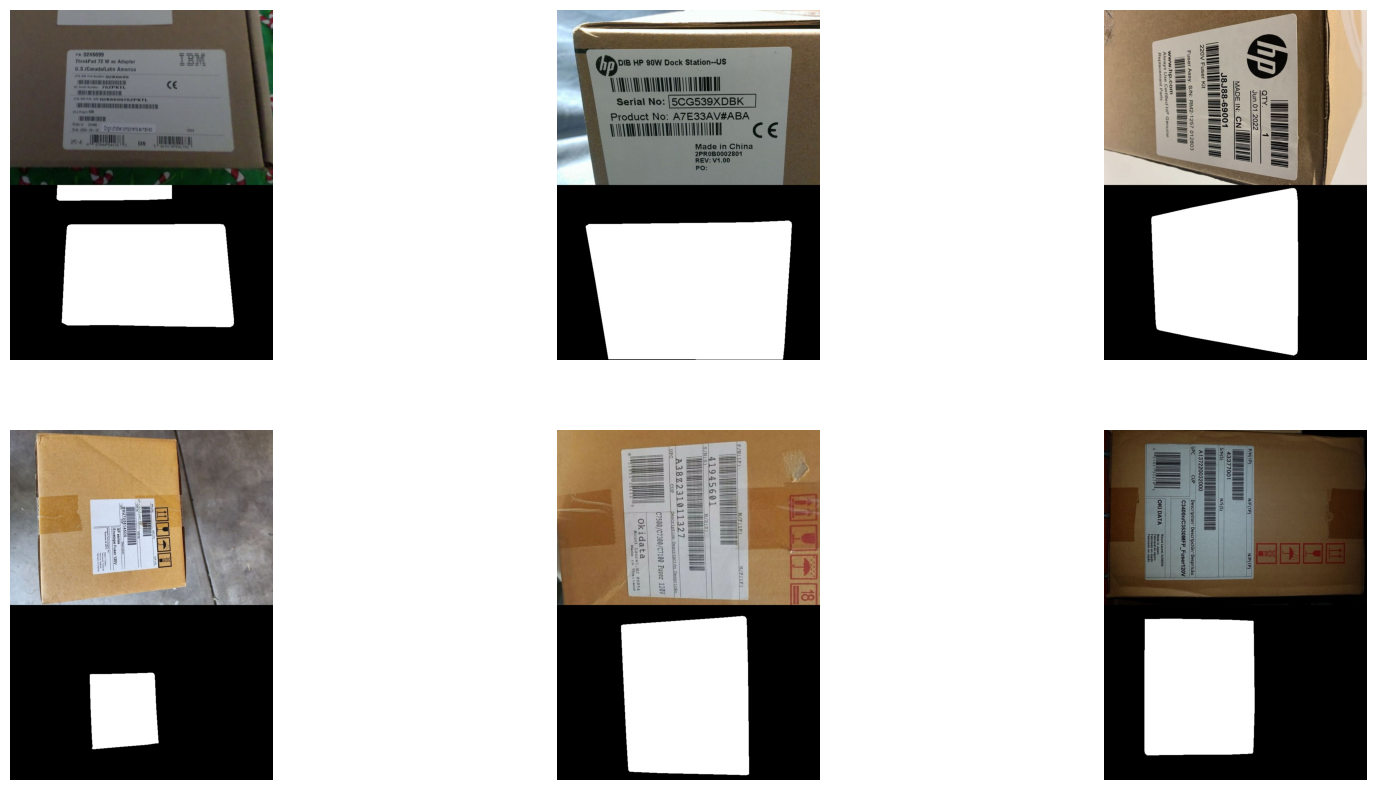

In [11]:
from imshowtools import imshow

cat = []

for x,y in zip(images[:6], masks[:6]):
  x = cv2.imread(x, cv2.IMREAD_COLOR)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
  y = cv2.imread(y, cv2.IMREAD_COLOR)
  z = np.concatenate((x, y), axis=0)
  cat.append(z)

imshow(*cat, size=(20, 10), columns=3)

### **Dataset split**

In [24]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset(images, masks, split=0.2)

In [25]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test: {len(test_x)} - {len(test_y)}")

Train: 30 - 30
Valid: 10 - 10
Test: 10 - 10


### **Saving the dataset**

#### ***1. Creating the folders***

In [27]:
save_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/data/dataset", "non-aug")
for item in ["train", "valid", "test"]:
  create_dir(os.path.join(save_dir, item, "images"))
  create_dir(os.path.join(save_dir, item, "masks"))

#### ***2. Saving the traing dataset***

In [28]:
save_dataset(train_x, train_y, save_dir=os.path.join(save_dir, "train"))

100%|██████████| 30/30 [00:23<00:00,  1.27it/s]


#### ***3. Saving the validation dataset***

In [29]:
save_dataset(valid_x, valid_y, save_dir=os.path.join(save_dir, "valid"))

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


#### ***4. Saving the testing dataset***

In [30]:
save_dataset(test_x, test_y, save_dir=os.path.join(save_dir, "test"))

100%|██████████| 10/10 [00:05<00:00,  2.00it/s]
